# Imersão de Dados Alura

## Desafios Aula 02 (20/10/2020)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


## Mega desafio: Pegar a amostra completa dos alunos de 13 e 14 anos

## Desafio02: Aumentar a amostra para alunos menor de idade e comparar a proporção por estado

In [2]:
dados.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts()

SP    7321
MG    3146
BA    1993
CE    1953
PE    1805
PR    1764
RJ    1651
PA    1268
GO    1199
MA    1164
RS     990
PB     838
SC     795
PI     678
MT     612
ES     517
DF     472
AL     446
RN     429
AM     428
MS     421
SE     405
TO     344
RO     234
AP     188
AC     109
RR      70
Name: SG_UF_RESIDENCIA, dtype: int64

In [3]:
menor_idade = dados.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts(normalize=True)
menor_idade

SP    0.234347
MG    0.100704
BA    0.063796
CE    0.062516
PE    0.057778
PR    0.056466
RJ    0.052849
PA    0.040589
GO    0.038380
MA    0.037260
RS    0.031690
PB    0.026825
SC    0.025448
PI    0.021703
MT    0.019590
ES    0.016549
DF    0.015109
AL    0.014277
RN    0.013732
AM    0.013700
MS    0.013476
SE    0.012964
TO    0.011012
RO    0.007490
AP    0.006018
AC    0.003489
RR    0.002241
Name: SG_UF_RESIDENCIA, dtype: float64

In [4]:
estados = []
for row in menor_idade.index:
    estados.append(row)
estados

['SP',
 'MG',
 'BA',
 'CE',
 'PE',
 'PR',
 'RJ',
 'PA',
 'GO',
 'MA',
 'RS',
 'PB',
 'SC',
 'PI',
 'MT',
 'ES',
 'DF',
 'AL',
 'RN',
 'AM',
 'MS',
 'SE',
 'TO',
 'RO',
 'AP',
 'AC',
 'RR']

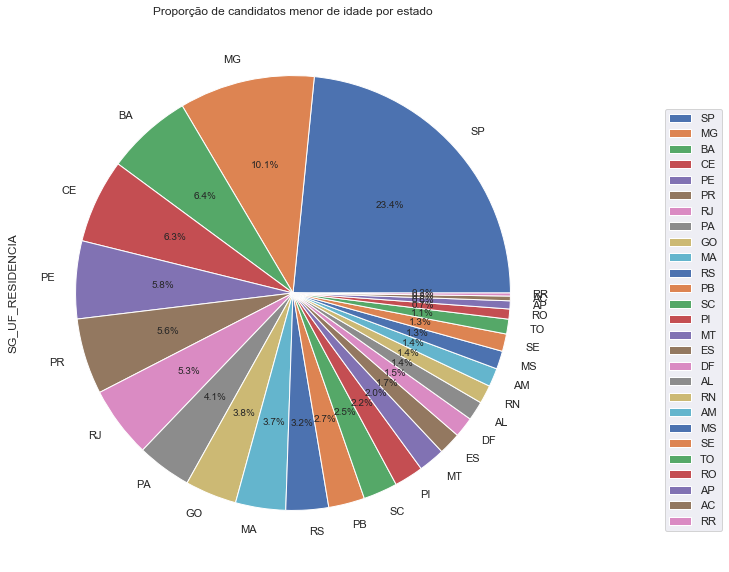

In [5]:
menor_idade.plot.pie(autopct = '%1.1f%%', title = 'Proporção de candidatos menor de idade por estado', figsize=(10,10))
plt.legend(estados, ncol=1, loc='center right', bbox_to_anchor=(0.8,0.2,0.5,0.5))
plt.show()

## Desafio03: Criar uma função para plotar o boxplot do seaborn

In [8]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [10]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

In [11]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


In [13]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()

In [17]:
def socio_eco_boxplot(eixoy):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Q006', y = eixoy, data = dados, order = renda_ordenada)

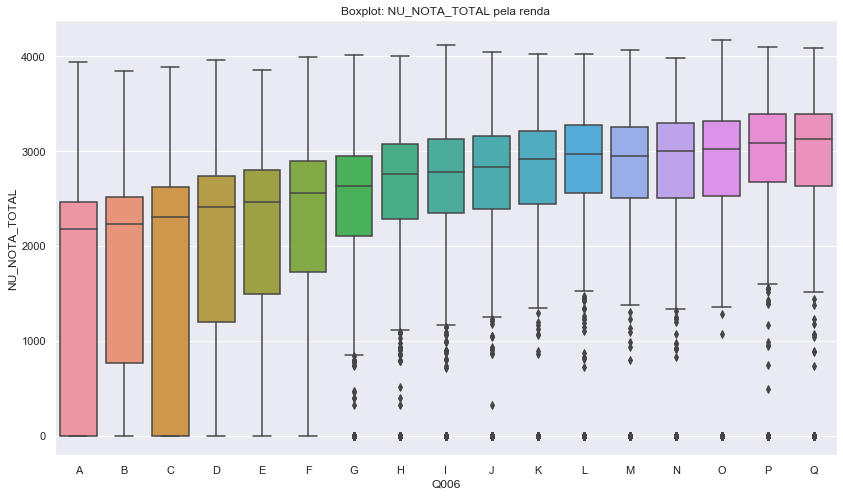

In [18]:
socio_eco_boxplot('NU_NOTA_TOTAL')

## Desafio04: Verificar se quem zerou a prova foi eliminado ou não estava presente

In [19]:
len(dados.query('NU_NOTA_TOTAL == 0'))

29162

In [22]:
#ausente em alguma prova
len(dados.query('NU_NOTA_TOTAL == 0').query('TP_PRESENCA_CN == 0 or TP_PRESENCA_CH == 0 or TP_PRESENCA_LC == 0 or TP_PRESENCA_MT == 0'))

29160

In [23]:
#eliminado em alguma prova
len(dados.query('NU_NOTA_TOTAL == 0').query('TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2'))

120

## Desafio05: Quem é eliminado tira zerou ou fica com NaN?

In [24]:
#ausente na prova de CN 
dados.query('TP_PRESENCA_CN == 0')['NU_NOTA_CN'].iloc[0]

nan

In [25]:
#eliminado na prova de CN 
dados.query('TP_PRESENCA_CN == 2')['NU_NOTA_CN'].iloc[0]

nan

## Desafio06: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiros e não treineiros

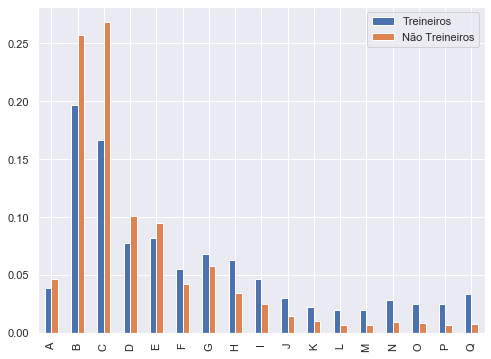

In [26]:
sim_treineiros = dados.query('IN_TREINEIRO == 1')['Q006'].value_counts(normalize=True)
nao_treineiros = dados.query('IN_TREINEIRO == 0')['Q006'].value_counts(normalize=True)

df = pd.DataFrame({'Treineiros': sim_treineiros,
                  'Não Treineiros': nao_treineiros})

df.plot.bar(figsize=(8,6))

## Desafio07: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia

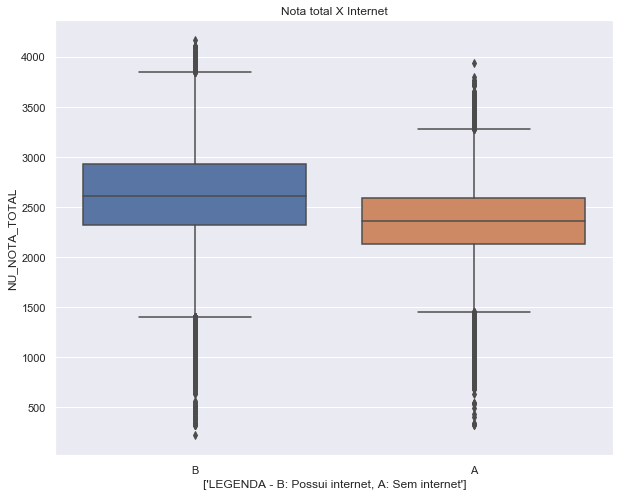

In [40]:
xlabel = ['LEGENDA - B: Possui internet, A: Sem internet']
plt.figure(figsize=(10,8))
plt.title('Nota total X Internet')
sns.boxplot(x='Q025', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero).set(xlabel=xlabel)


plt.show()